Linear Regression:
used to predict home prices, stock price, weather where the predicted value is continuous 

logical Regression is used to solve classification problems 
like whether am email is spam or not etc

sigmoid function :
1/(1+e^-y)  where y=mx+b

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('lec8.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


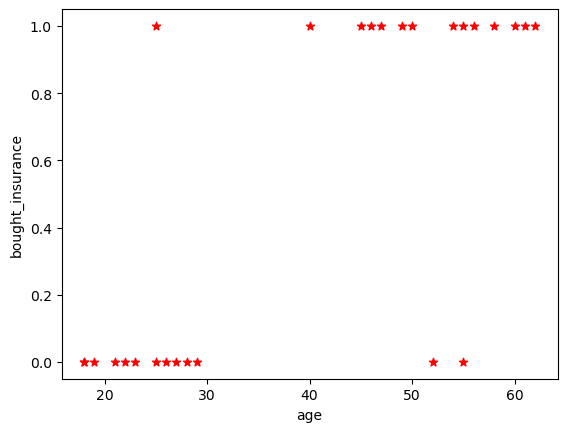

In [7]:
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.scatter(df['age'],df['bought_insurance'],color='red',marker='*')

# note X should always be multi-dimensinal array

In [20]:
X = df[['age']]
y = df.bought_insurance

In [21]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [22]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [25]:
X_train

,age
3,52
17,58
23,45
16,25
5,56
12,27
26,23
7,60
25,54
0,22


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
model.predict(X_test)

array([0, 1, 0], dtype=int64)

In [30]:
y_test

19    0
4     1
13    0
Name: bought_insurance, dtype: int64

In [31]:
model.score(X_test,y_test)

1.0

In [34]:
model.predict_proba(X_test)   ##probability of a person not buying insurance vs buying

array([[0.93112905, 0.06887095],
       [0.2879948 , 0.7120052 ],
       [0.7730313 , 0.2269687 ]])

# Exercise

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('ex_lec8.csv')

In [4]:
df.shape

(14999, 10)

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
left = df[df.left==1]
left.shape

(3571, 10)

so 3571 employees have left the organisation

In [7]:
retained = df[df.left==0]
retained.shape

(11428, 10)

11428 employees are retained at the firm

In [8]:
df.groupby('left').mean()

C:\Users\risha\AppData\Local\Temp\ipykernel_22144\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)


**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)


**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

In [9]:
salary_effect = pd.crosstab(df.salary,df.left)

In [10]:
salary_effect 

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

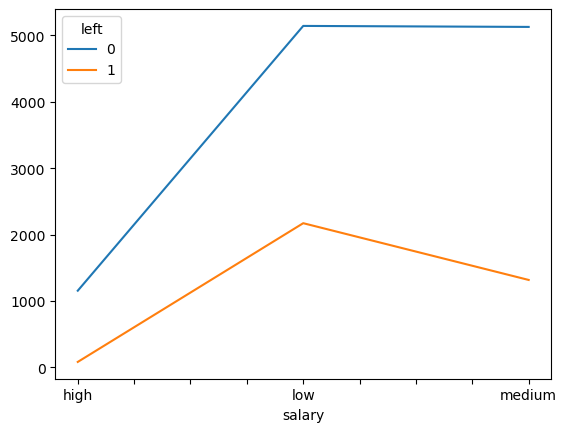

In [11]:
salary_effect.plot()

<Axes: xlabel='salary'>

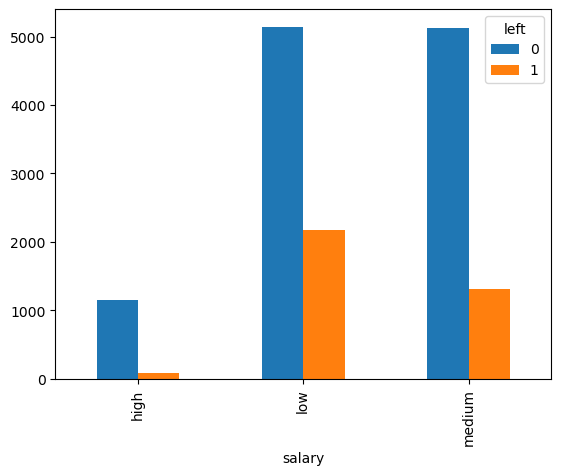

In [12]:
salary_effect.plot(kind = 'bar')

In [13]:
department_effect = pd.crosstab(df.Department,df.left)
department_effect

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='Department'>

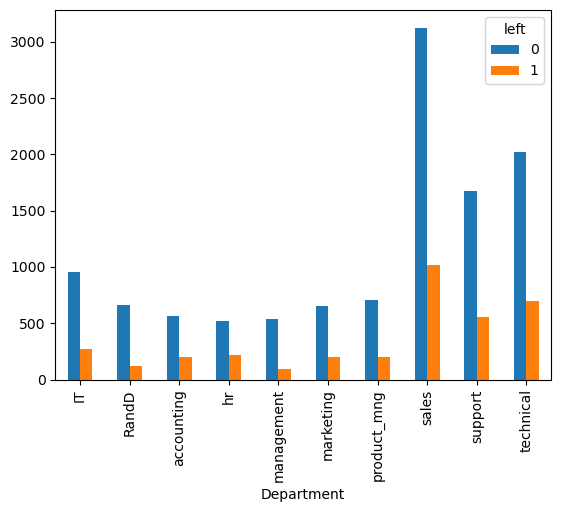

In [14]:
department_effect.plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model


**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [15]:
newdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


now we need to deal with salary variable

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
dfle = newdf
dfle['salary'] = le.fit_transform(newdf['salary'])
dfle.head()

C:\Users\risha\AppData\Local\Temp\ipykernel_22144\858471579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle['salary'] = le.fit_transform(newdf['salary'])


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,1,1
1,0.80,262,0,2,1
2,0.11,272,0,2,1
3,0.72,223,0,1,1
4,0.37,159,0,1,1


In [80]:
X = dfle.drop(['left'],axis='columns')
X = np.array(X)
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [81]:
y = dfle['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('salary',OneHotEncoder(),[3])],remainder='passthrough')

In [85]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [86]:
X = X[:,1:]

In [87]:
X

array([[1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [94]:
model.fit(X_train,y_train)

LogisticRegression()

In [95]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
y_test

9983     0
13408    0
14677    1
12278    1
4247     0
        ..
2078     0
10914    0
5668     0
6446     0
11996    0
Name: left, Length: 1500, dtype: int64

In [97]:
model.score(X_test,y_test)

0.7806666666666666